Investigate the given dataset.

## Application Parameters

Note: algorithm tuning is done with declaration of the model.

In [2]:
debug = False

DRIVE_PATH = "/content/drive/MyDrive/data606/"

# Set the location of this script in GDrive
SCRIPT_PATH = DRIVE_PATH + "src/"

# Root Path of the data on the cloud drive
DATA_PATH = DRIVE_PATH + "data/"

# Number of samples to work with - will be split  into train/test
SAMPLE_SIZE = 5000

# Ratio of test data to train data - used for split
TEST_RATIO = 0.3

# Device to run on
run_on_device =  'cpu' # 'cuda'

# Start including data from this date
START_DATE =  date.fromisoformat('1950-01-01')
# Stop including data after this date
END_DATE = date.fromisoformat('2022-12-31')


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Load

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.rcParams["figure.figsize"] = (10,6)
import yfinance as yf
yf.pdr_override()
import datetime
from datetime import date
import warnings

In [4]:
warnings.filterwarnings('ignore')
plt.style.use('seaborn')
%matplotlib inline

---

**Initial Data Load**

---

In [7]:
FILE_LIST = [['GlobalTemperatures.csv','dt'],
             ['GlobalLandTemperaturesByCity.csv','dt'],
             ['GlobalLandTemperaturesByCity.csv','dt'],
             ['GlobalLandTemperaturesByMajorCity.csv','dt'],
             ['GlobalLandTemperaturesByState.csv','dt'],
             ['GlobalEnvPolicies.csv','date'],
             ]

*NOTE:  Is there a way to build a re-usable data load and normalization routine? For at least the simple datasets? And would that be helpful.*

### Regular Data


In [22]:
from IPython import display
from time import sleep

============ GlobalTemperatures.csv =================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.

array([[<Axes: title={'center': 'LandAverageTemperature'}>,
        <Axes: title={'center': 'LandAverageTemperatureUncertainty'}>,
        <Axes: title={'center': 'LandMaxTemperature'}>],
       [<Axes: title={'center': 'LandMaxTemperatureUncertainty'}>,
        <Axes: title={'center': 'LandMinTemperature'}>,
        <Axes: title={'center': 'LandMinTemperatureUncertainty'}>],
       [<Axes: title={'center': 'LandAndOceanAverageTemperature'}>,
        <Axes: title={'center': 'LandAndOceanAverageTemperatureUncertainty'}>,
        <Axes: >]], dtype=object)

============ GlobalLandTemperaturesByCity.csv =================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   dt                             object 
 1   AverageTemperature             float64
 2   AverageTemperatureUncertainty  float64
 3   City                           object 
 4   Country                        object 
 5   Latitude                       object 
 6   Longitude                      object 
dtypes: float64(2), object(5)
memory usage: 459.2+ MB


array([[<Axes: title={'center': 'AverageTemperature'}>,
        <Axes: title={'center': 'AverageTemperatureUncertainty'}>]],
      dtype=object)

============ GlobalLandTemperaturesByCity.csv =================


KeyboardInterrupt: ignored

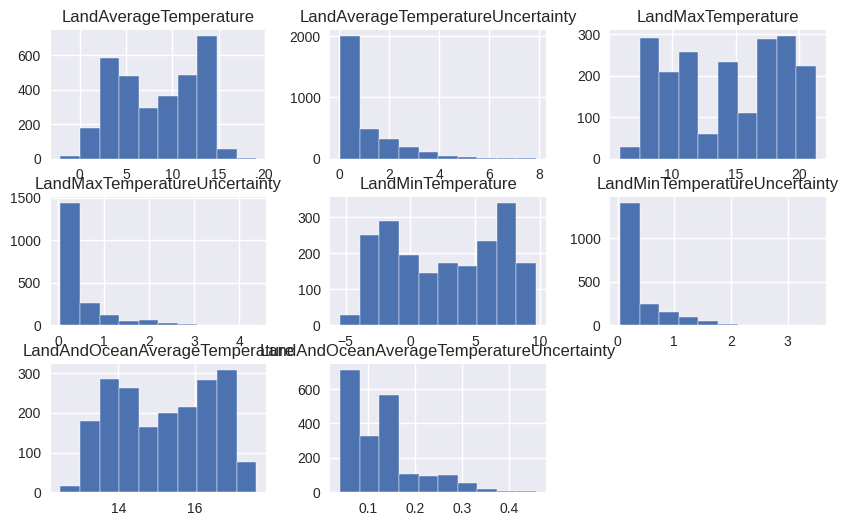

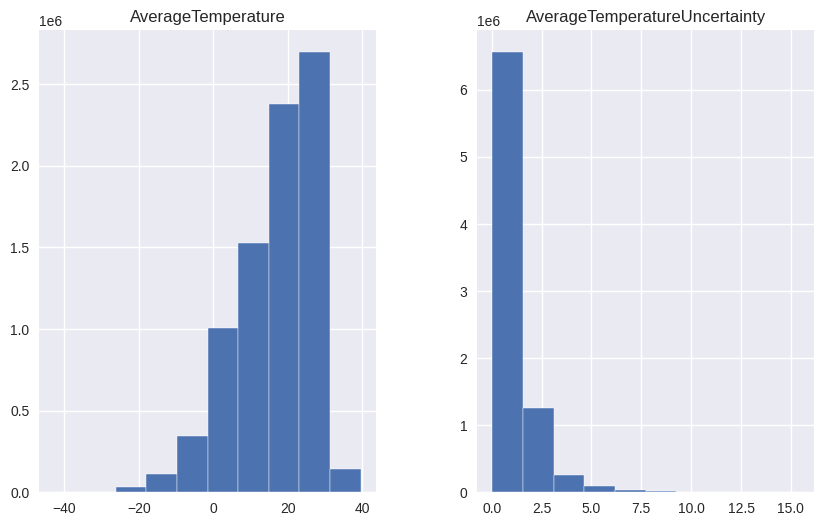

In [24]:
plt.rcParams["figure.figsize"] = [10,6]

for ff in FILE_LIST:
  print(f'============ {ff[0]} =================')
  df = pd.read_csv(DATA_PATH + ff[0])
  df.shape
  df.describe().T
  df.info()
  df.tail(3)

  display.display(df.hist())
  #display.clear_output(wait=True)
  sleep(0.5)

In [13]:
n = -1

============ GlobalTemperatures.csv =================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.

array([[<Axes: title={'center': 'LandAverageTemperature'}>,
        <Axes: title={'center': 'LandAverageTemperatureUncertainty'}>,
        <Axes: title={'center': 'LandMaxTemperature'}>],
       [<Axes: title={'center': 'LandMaxTemperatureUncertainty'}>,
        <Axes: title={'center': 'LandMinTemperature'}>,
        <Axes: title={'center': 'LandMinTemperatureUncertainty'}>],
       [<Axes: title={'center': 'LandAndOceanAverageTemperature'}>,
        <Axes: title={'center': 'LandAndOceanAverageTemperatureUncertainty'}>,
        <Axes: >]], dtype=object)

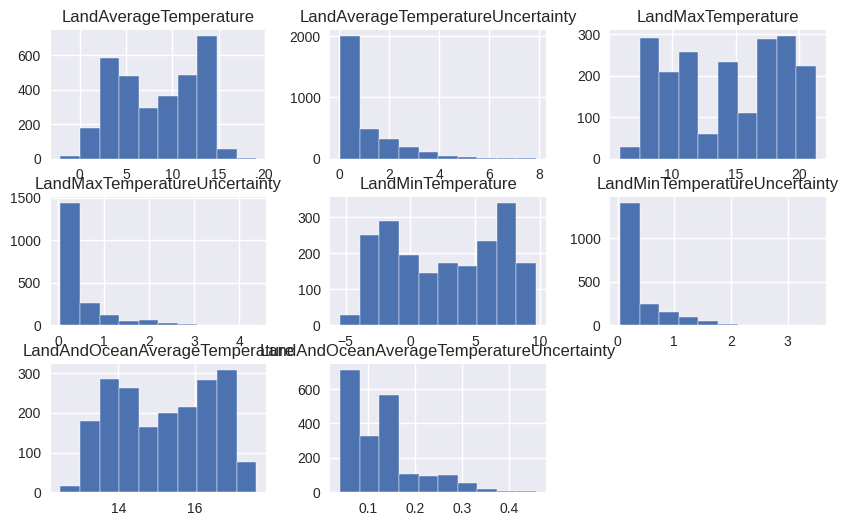

In [16]:
n = n+1
curf = FILE_LIST[n][0]
print(f'============ {curf} =================')
df = pd.read_csv(DATA_PATH + curf)
df.shape
df.describe().T
df.info()
df.tail(3)
df.hist()


============ GlobalLandTemperaturesByCity.csv =================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   dt                             object 
 1   AverageTemperature             float64
 2   AverageTemperatureUncertainty  float64
 3   City                           object 
 4   Country                        object 
 5   Latitude                       object 
 6   Longitude                      object 
dtypes: float64(2), object(5)
memory usage: 459.2+ MB


array([[<Axes: title={'center': 'AverageTemperature'}>,
        <Axes: title={'center': 'AverageTemperatureUncertainty'}>]],
      dtype=object)

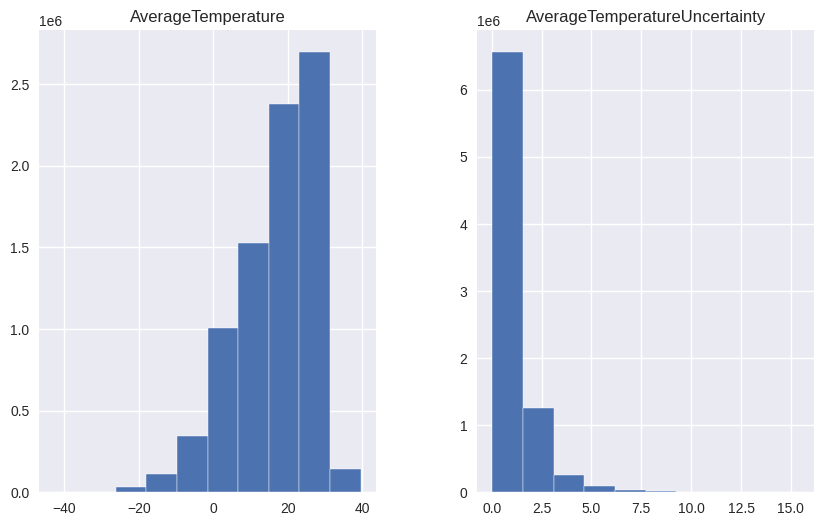

In [17]:
n = n+1
curf = FILE_LIST[n][0]
print(f'============ {curf} =================')
df = pd.read_csv(DATA_PATH + curf)
df.shape
df.describe().T
df.info()
df.tail(3)
df.hist()

============ GlobalLandTemperaturesByCity.csv =================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   dt                             object 
 1   AverageTemperature             float64
 2   AverageTemperatureUncertainty  float64
 3   City                           object 
 4   Country                        object 
 5   Latitude                       object 
 6   Longitude                      object 
dtypes: float64(2), object(5)
memory usage: 459.2+ MB


array([[<Axes: title={'center': 'AverageTemperature'}>,
        <Axes: title={'center': 'AverageTemperatureUncertainty'}>]],
      dtype=object)

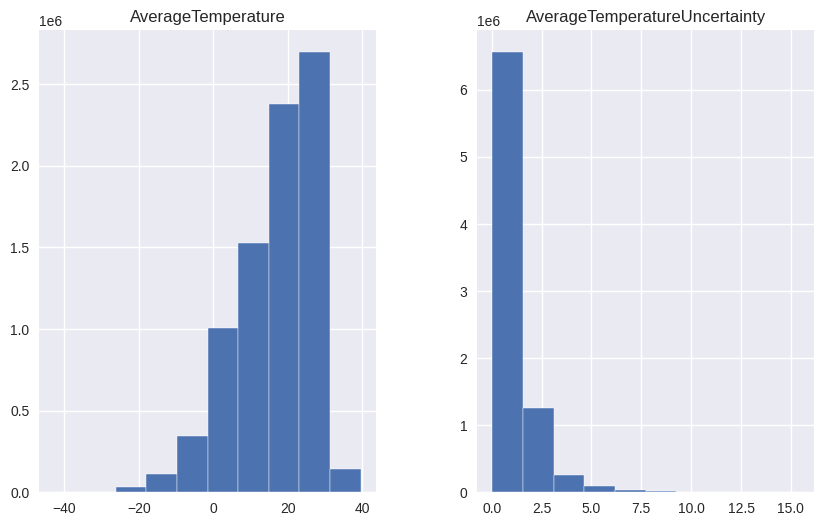

In [18]:
n = n+1
curf = FILE_LIST[n][0]
print(f'============ {curf} =================')
df = pd.read_csv(DATA_PATH + curf)
df.shape
df.describe().T
df.info()
df.tail(3)
df.hist()

============ GlobalLandTemperaturesByMajorCity.csv =================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239177 entries, 0 to 239176
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             239177 non-null  object 
 1   AverageTemperature             228175 non-null  float64
 2   AverageTemperatureUncertainty  228175 non-null  float64
 3   City                           239177 non-null  object 
 4   Country                        239177 non-null  object 
 5   Latitude                       239177 non-null  object 
 6   Longitude                      239177 non-null  object 
dtypes: float64(2), object(5)
memory usage: 12.8+ MB


array([[<Axes: title={'center': 'AverageTemperature'}>,
        <Axes: title={'center': 'AverageTemperatureUncertainty'}>]],
      dtype=object)

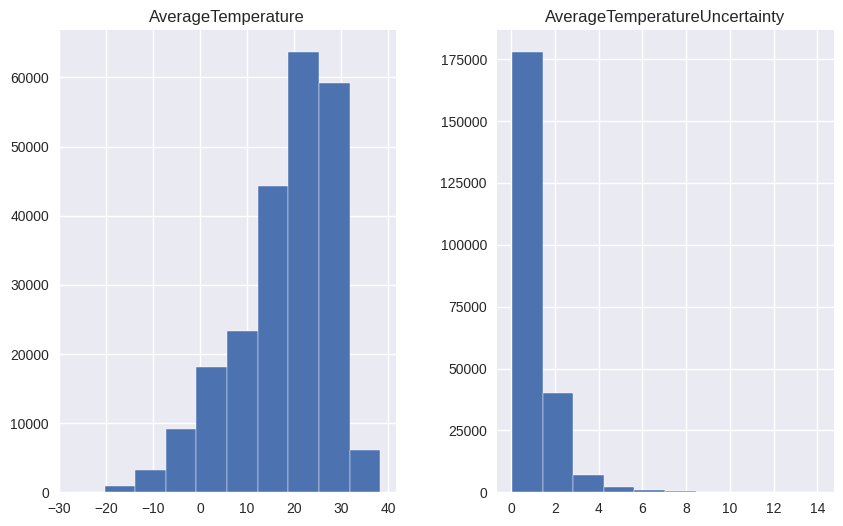

In [19]:
n = n+1
curf = FILE_LIST[n][0]
print(f'============ {curf} =================')
df = pd.read_csv(DATA_PATH + curf)
df.shape
df.describe().T
df.info()
df.tail(3)
df.hist()

============ GlobalLandTemperaturesByState.csv =================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645675 entries, 0 to 645674
Data columns (total 5 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             645675 non-null  object 
 1   AverageTemperature             620027 non-null  float64
 2   AverageTemperatureUncertainty  620027 non-null  float64
 3   State                          645675 non-null  object 
 4   Country                        645675 non-null  object 
dtypes: float64(2), object(3)
memory usage: 24.6+ MB


array([[<Axes: title={'center': 'AverageTemperature'}>,
        <Axes: title={'center': 'AverageTemperatureUncertainty'}>]],
      dtype=object)

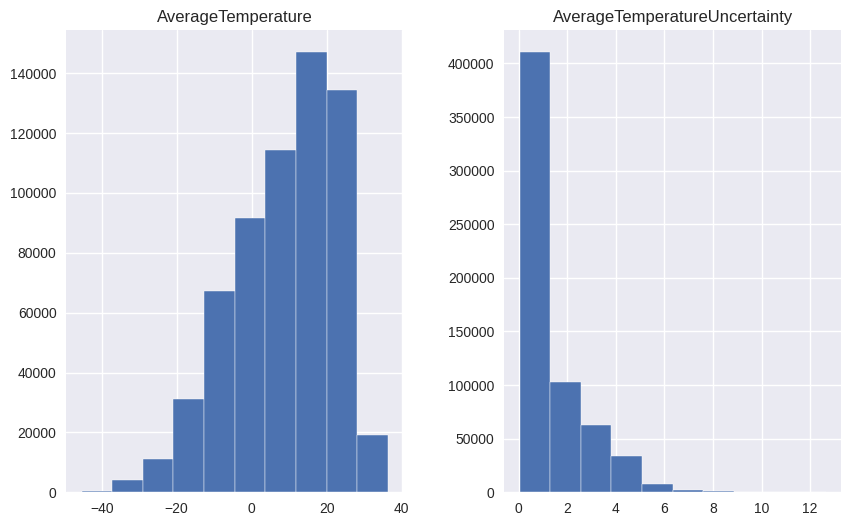

In [20]:
n = n+1
curf = FILE_LIST[n][0]
print(f'============ {curf} =================')
df = pd.read_csv(DATA_PATH + curf)
df.shape
df.describe().T
df.info()
df.tail(3)
df.hist()

In [21]:
n = n+1
curf = FILE_LIST[n][0]
print(f'============ {curf} =================')
df = pd.read_csv(DATA_PATH + curf)
df.shape
df.describe().T
df.info()
df.tail(3)
df.hist()

============ GlobalEnvPolicies.csv =================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         24 non-null     object
 1   eventName    24 non-null     object
 2   description  24 non-null     object
dtypes: object(3)
memory usage: 704.0+ bytes


ValueError: ignored

In [ ]:
# convert to date
df['date'] = pd.to_datetime(df['dt']).dt.date

In [ ]:
df['date'][3191], START_DATE

(datetime.date(2015, 12, 1), datetime.date(1950, 1, 1))

In [ ]:
# Truncate by date
df = df[df['date'] >= START_DATE]
df = df[df['date'] <= END_DATE]

In [ ]:
# Drop uncertainties until we know what to do with them
DROP_LIST = ['LandAverageTemperatureUncertainty','LandMaxTemperatureUncertainty','LandMinTemperatureUncertainty','LandAndOceanAverageTemperatureUncertainty']

In [ ]:
df

,dt,LandAverageTemperature,LandMaxTemperature,LandMinTemperature,LandAndOceanAverageTemperature,n_date
2401,1950-02-01,2.721,8.475,-3.013,13.554,1950-02-01
2402,1950-03-01,5.247,11.173,-0.693,14.296,1950-03-01
2403,1950-04-01,8.123,14.157,2.043,15.093,1950-04-01
2404,1950-05-01,11.297,17.252,5.421,16.033,1950-05-01
2405,1950-06-01,13.382,19.290,7.501,16.660,1950-06-01
...,...,...,...,...,...,...
3187,2015-08-01,14.755,20.699,9.005,17.589,2015-08-01
3188,2015-09-01,12.999,18.845,7.199,17.049,2015-09-01
3189,2015-10-01,10.801,16.450,5.232,16.290,2015-10-01
3190,2015-11-01,7.433,12.892,2.157,15.252,2015-11-01


In [ ]:
COLS = ['LandAverageTemperature',	'LandMaxTemperature',	'LandMinTemperature',	'LandAndOceanAverageTemperature']

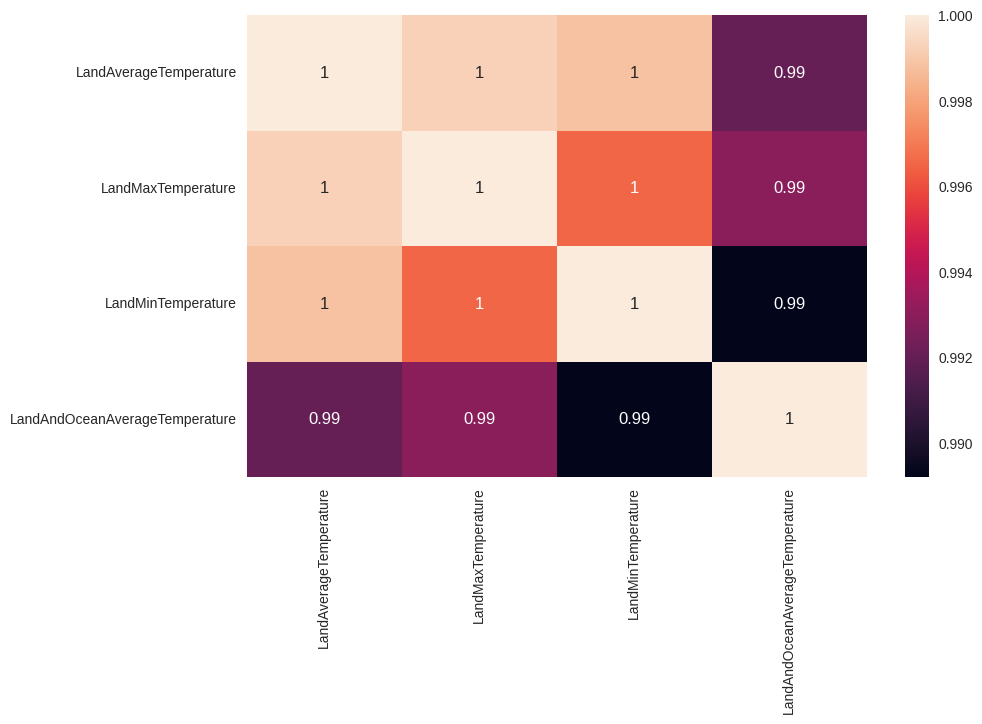

In [ ]:
corr = df.corr()
sns.heatmap(corr, annot=True);


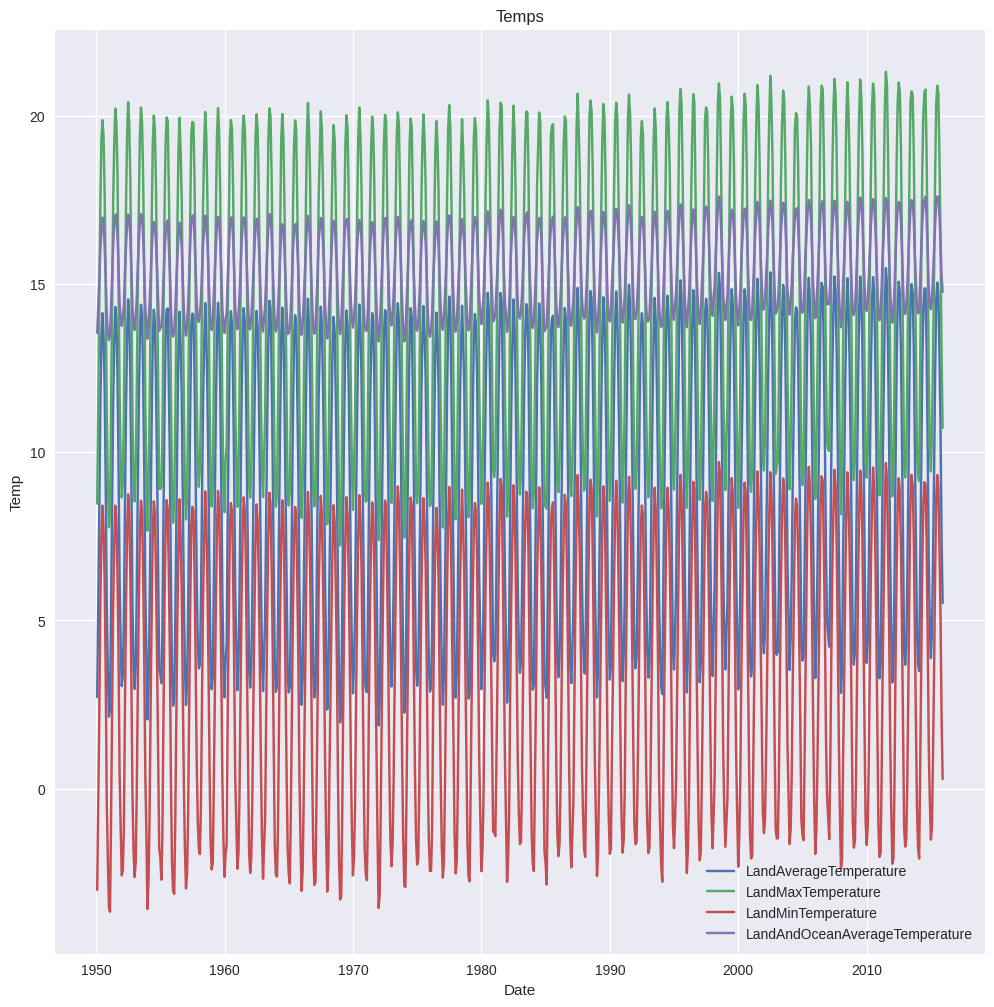

In [ ]:
plt.rcParams["figure.figsize"] = [12,12]
plt.plot(df['n_date'], df[COLS])
plt.xlabel('Date')
plt.ylabel('Temp')
plt.title('Temps')
plt.legend(COLS)
plt.show()

In [ ]:
temp_norm = (df-df.mean())/df.std()

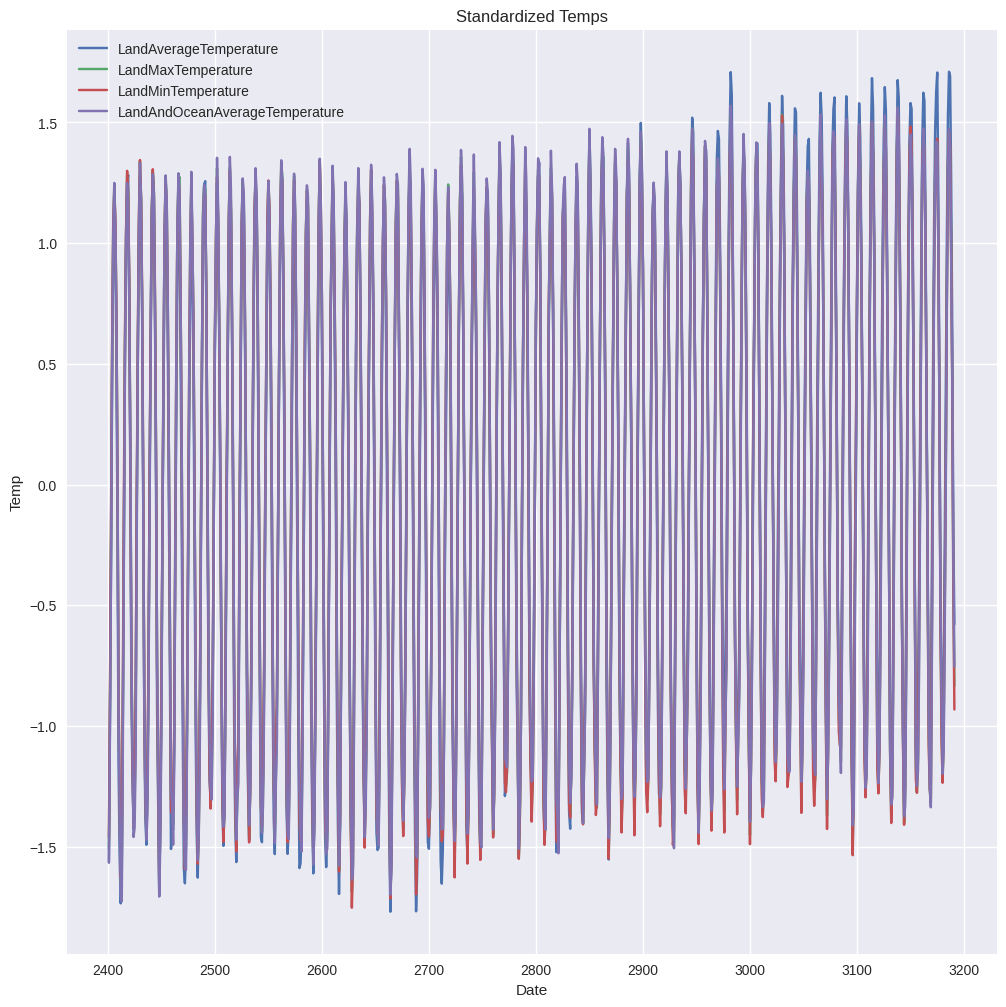

In [ ]:
plt.rcParams["figure.figsize"] = [12,12]
plt.plot(temp_norm)
plt.xlabel('Date')
plt.ylabel('Temp')
plt.title('Standardized Temps')
plt.legend(COLS)
plt.show()

array([[<Axes: title={'center': 'LandAverageTemperature'}>,
        <Axes: title={'center': 'LandMaxTemperature'}>],
       [<Axes: title={'center': 'LandMinTemperature'}>,
        <Axes: title={'center': 'LandAndOceanAverageTemperature'}>]],
      dtype=object)

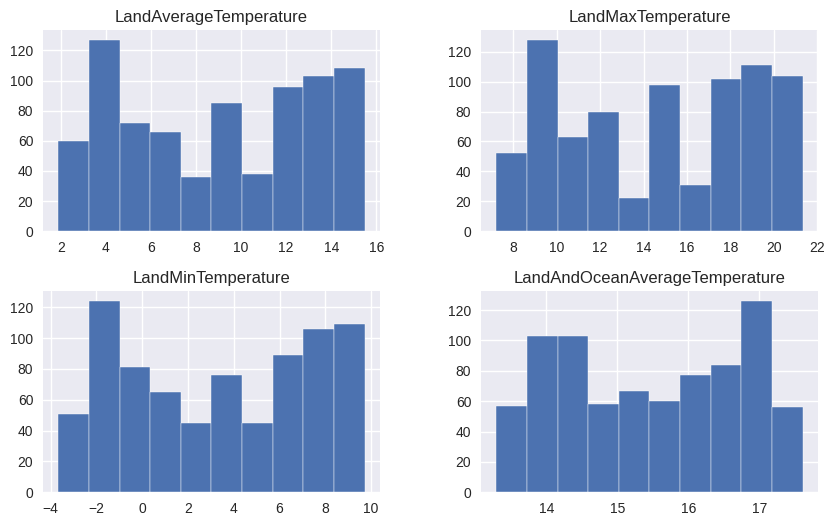

In [ ]:
plt.rcParams["figure.figsize"] = [10,6]
df.hist()

----------------------------

**Investigate Stationarity**

-----------------------------

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

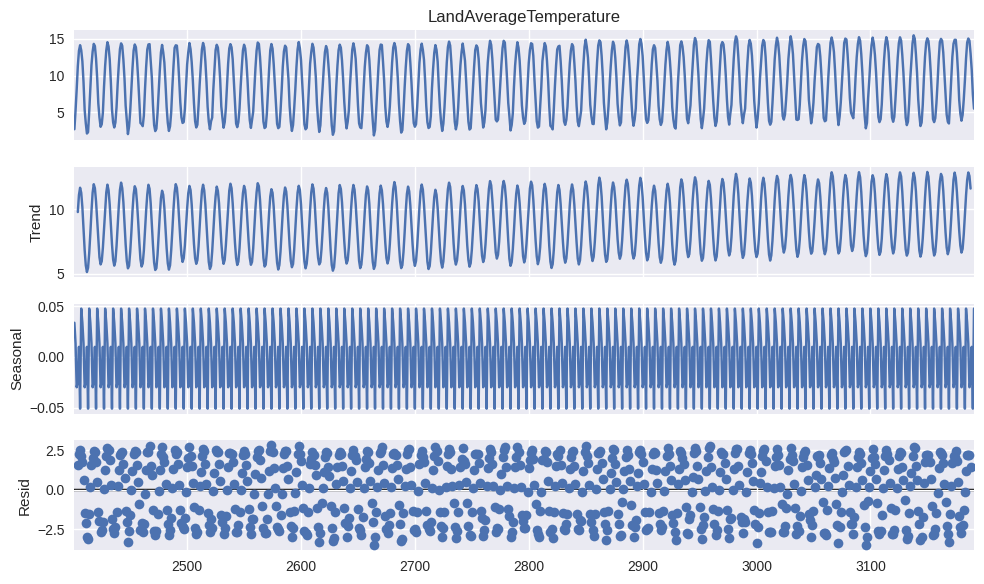

In [ ]:
decomposition = seasonal_decompose(df['LandAverageTemperature'], model='additive', period=7)
decomposition.plot()
plt.show()

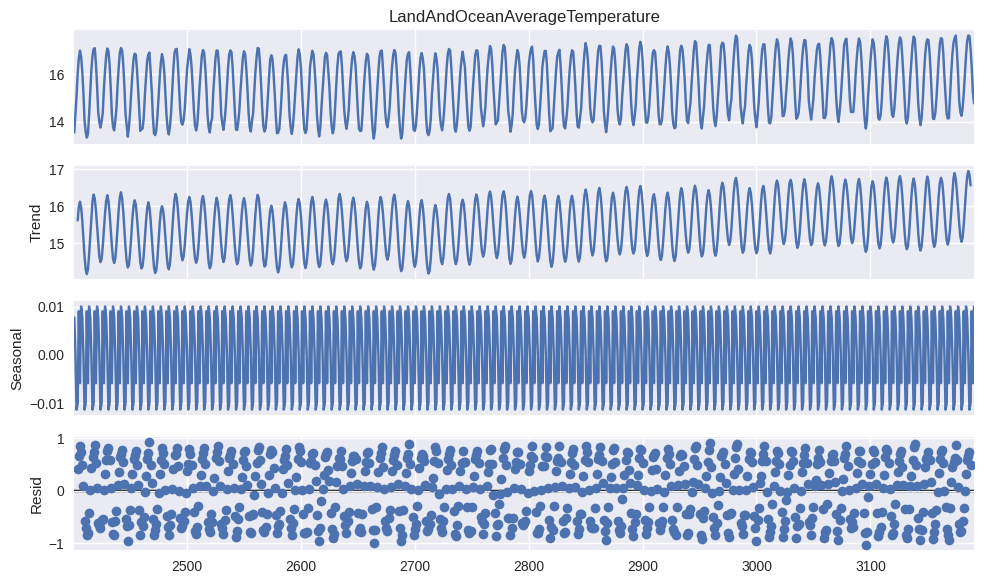

In [ ]:
decomposition = seasonal_decompose(df['LandAndOceanAverageTemperature'], model='additive', period=7)
decomposition.plot()
plt.show()

# Prediction

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from tqdm import tqdm_notebook
from itertools import product

In [ ]:
# Check if data is stationary or not
from statsmodels.tsa.stattools import adfuller
ad_fuller_result_1 = adfuller(df['LandAverageTemperature'])

print('S&P500')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(df['LandAndOceanAverageTemperature'])

print('FTAS')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

S&P500
ADF Statistic: -1.3573109788024065
p-value: 0.6025621817710012

---------------------

FTAS
ADF Statistic: -0.6361344680817747
p-value: 0.8626063249815135


Since p-value is greater than 0.05 we fail to reject the null.And we dont have enough evidence to reject the null so data is not stationary.

In [ ]:
# Make data satationary
from statsmodels.tsa.stattools import adfuller
ad_fuller_result_1 = adfuller(df['LandAverageTemperature'].diff()[1:])

print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(df['LandAndOceanAverageTemperature'].diff()[1:])

print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

S&P500
ADF Statistic: -11.655117657051887
p-value: 1.994009627556605e-21

---------------------

FTAS
ADF Statistic: -11.615453735025339
p-value: 2.455191466266926e-21
